# Import all libraries needed here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
from shapely.geometry import Point

# Read in the employment dataset

In [2]:
employment_data_raw = pd.read_csv('../data/raw/SALM Smoothed SA2 Datafiles (ASGS 2016) - March quarter 2022 (2).csv')

# II. Preprocess the employment dataset

Similar to preprocessing the weather dataset, 

To make the preprocessing steps more compact, versatile, and reversible, 

I will create a dictionary (where its value is also a dictionary) as such: 

- <code> history_employ_preproc = { num_iteration: {'data': pd_data, 'description': what_is_done} } </code>, where: 
    - <code>num_iteration = 0,1,2,...</code> signifying how many times the dataset has been altered for preprocessing
    - <code>history_employ_preproc[num_iteration]['description']</code> is a (preferrably short) description of what has been done to the dataframe, in which the resulting dataframe will be stored in <code>history_employ_preproc[num_iteration]['data']</code>



A caveat of this is that it can be memory intensive but we'll see the consequences later

In [3]:
history_employ_preproc = {0: {'data': employment_data_raw, 'description':'raw data'} }

In [4]:
employment_data_raw.head()

,Note,"Cells containing a dash (-) indicate that data are unavailable. Estimates are unavailable either because the SA2 labour force estimate did not meet the minimum size or because there is a break in the series caused by the shift from the 2011 to the 2016 ASGS. For more information, see SALM Methodology page on the National Skills Commission (NSC) website and the 2016 ASGS changeover user guide (also available from the NSC website).",Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48
0,Data Item,Statistical Area Level 2 (SA2) (2016 ASGS),SA2 Code (2016 ASGS),Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
1,Smoothed unemployment (persons),Braidwood,101021007,53,42,38,39,44,47,51,...,65,64,73,72,79,85,88,94,103,109
2,Smoothed unemployment (persons),Karabar,101021008,132,99,88,83,91,96,100,...,170,182,202,191,204,210,224,242,258,267
3,Smoothed unemployment (persons),Queanbeyan,101021009,209,164,139,135,143,152,159,...,179,192,223,225,248,261,274,298,314,323
4,Smoothed unemployment (persons),Queanbeyan - East,101021010,50,39,35,34,39,43,45,...,61,63,76,77,88,94,97,106,112,118


Now the first row should be the columns instead of the current one, which is not uncommon for excel files to have notes on top of the data itself

In [5]:
original_cols = list(history_employ_preproc[0]['data'].iloc[0,:])

Mapping the original columns to the desired columns

In [6]:
map_curr_col_to_original_cols = dict(zip(history_employ_preproc[0]['data'].columns, original_cols))

# <font color='blue'>Preprocessing: fix the column names </font>

In [7]:
history_employ_preproc[1] = {'data':None, 'description':None}
history_employ_preproc[1]['data'] = history_employ_preproc[0]['data'].rename(columns = map_curr_col_to_original_cols).drop(0).copy()
history_employ_preproc[1]['description'] = 'Fixing the columns'

In [8]:
history_employ_preproc[1]['data']

,Data Item,Statistical Area Level 2 (SA2) (2016 ASGS),SA2 Code (2016 ASGS),Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
1,Smoothed unemployment (persons),Braidwood,101021007,53,42,38,39,44,47,51,...,65,64,73,72,79,85,88,94,103,109
2,Smoothed unemployment (persons),Karabar,101021008,132,99,88,83,91,96,100,...,170,182,202,191,204,210,224,242,258,267
3,Smoothed unemployment (persons),Queanbeyan,101021009,209,164,139,135,143,152,159,...,179,192,223,225,248,261,274,298,314,323
4,Smoothed unemployment (persons),Queanbeyan - East,101021010,50,39,35,34,39,43,45,...,61,63,76,77,88,94,97,106,112,118
5,Smoothed unemployment (persons),Queanbeyan Region,101021011,78,59,48,42,45,47,52,...,88,94,124,127,142,153,151,160,163,164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,Smoothed unemployment rate (%),Torrens,801091110,4,3.7,4.1,4.1,4.1,4.5,4,...,3.4,2.9,2.9,2.8,2.9,3.2,3.4,3.7,4.1,4
6519,Smoothed unemployment rate (%),Coombs,801101135,-,-,-,-,-,-,-,...,-,3.6,3.4,3.3,3.3,3.5,3.4,3.1,3.2,3
6520,Smoothed unemployment rate (%),Denman Prospect,801101136,-,-,-,-,-,-,-,...,-,2.8,2.6,2.4,2.4,2.8,2.9,3.3,3.7,4
6521,Smoothed unemployment rate (%),Wright,801101139,-,-,-,-,-,-,-,...,-,0.8,1.1,1.3,1.5,1.8,1.9,1.9,1.9,1.8


# Take a look at <code>Data Item</code>. It seems that it provides an indicator of what do the numbers mean.

In [9]:
history_employ_preproc[1]['data']['Data Item'].unique()

array(['Smoothed unemployment (persons)',
       'Smoothed labour force (persons)',
       'Smoothed unemployment rate (%)'], dtype=object)

# <font color='blue'> Preprocessing: we only need unemployment rate. The number of ppl itself isn't really useful </font>

In [10]:
history_employ_preproc[2] = {'data':None, 'description':None}

history_employ_preproc[2]['data'] = history_employ_preproc[1]['data'][
    history_employ_preproc[1]['data']['Data Item'] == 'Smoothed unemployment rate (%)'
].drop(columns='Data Item').copy()


#also, renaming the first 2 columns to make their names easier to read:

history_employ_preproc[2]['data'] = history_employ_preproc[2]['data'].\
    rename(columns={'Statistical Area Level 2 (SA2) (2016 ASGS)':'SA2_Name',
                    'SA2 Code (2016 ASGS)':'SA2_Code'})


history_employ_preproc[2]['description'] = 'Only obtain unemployment rates, fix first 2 column names'

In [11]:
history_employ_preproc[2]['data']

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
4349,Braidwood,101021007,3,2.3,2.1,2.1,2.3,2.5,2.7,2.8,...,2.9,2.9,3.2,3.2,3.6,4,4.2,4.6,5.1,5.3
4350,Karabar,101021008,2.5,1.8,1.6,1.5,1.6,1.7,1.8,2.1,...,3.4,3.7,4,3.9,4.2,4.5,4.9,5.4,5.8,6
4351,Queanbeyan,101021009,3.3,2.5,2.1,2,2.1,2.3,2.3,2.7,...,2.6,2.7,3.2,3.2,3.6,3.9,4.2,4.7,5,5.1
4352,Queanbeyan - East,101021010,1.6,1.2,1.1,1,1.2,1.3,1.3,1.5,...,1.8,1.9,2.3,2.3,2.7,3,3.2,3.6,3.8,4
4353,Queanbeyan Region,101021011,0.9,0.7,0.5,0.5,0.5,0.5,0.6,0.6,...,0.7,0.7,1,1,1.1,1.2,1.2,1.4,1.4,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,Torrens,801091110,4,3.7,4.1,4.1,4.1,4.5,4,4.1,...,3.4,2.9,2.9,2.8,2.9,3.2,3.4,3.7,4.1,4
6519,Coombs,801101135,-,-,-,-,-,-,-,-,...,-,3.6,3.4,3.3,3.3,3.5,3.4,3.1,3.2,3
6520,Denman Prospect,801101136,-,-,-,-,-,-,-,-,...,-,2.8,2.6,2.4,2.4,2.8,2.9,3.3,3.7,4
6521,Wright,801101139,-,-,-,-,-,-,-,-,...,-,0.8,1.1,1.3,1.5,1.8,1.9,1.9,1.9,1.8


Now, pick the SA2s *only* in Victoria. 
- To do this need to look at the lookup dataset <code>sa2_and_states</code> created below

In [12]:
sa2_and_states = pd.read_excel('../data/raw/list_of_SA2_and_their_SA3_and_state.xlsx')

Hence, we only need <code>['SA2_MAINCODE_2016', 'SA2_NAME_2016']</code>
- and <code>'STATE_NAME_2016'</code> but just for filtering SA2s in Victoria

In [13]:
sa2s_in_vic = sa2_and_states[sa2_and_states['STATE_NAME_2016'] == 'Victoria'][['SA2_MAINCODE_2016', 'SA2_NAME_2016']]

In [14]:
sa2s_in_vic

,SA2_MAINCODE_2016,SA2_NAME_2016
578,201011001,Alfredton
579,201011002,Ballarat
580,201011003,Ballarat - North
581,201011004,Ballarat - South
582,201011005,Buninyong
...,...,...
1037,217041478,Moyne - West
1038,217041479,Warrnambool - North
1039,217041480,Warrnambool - South
1040,297979799,Migratory - Offshore - Shipping (Vic.)


Perform an inner join (inner because we don't care about the rest of SA2s outside Victoria)

In [15]:
history_employ_preproc[2]['data']

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
4349,Braidwood,101021007,3,2.3,2.1,2.1,2.3,2.5,2.7,2.8,...,2.9,2.9,3.2,3.2,3.6,4,4.2,4.6,5.1,5.3
4350,Karabar,101021008,2.5,1.8,1.6,1.5,1.6,1.7,1.8,2.1,...,3.4,3.7,4,3.9,4.2,4.5,4.9,5.4,5.8,6
4351,Queanbeyan,101021009,3.3,2.5,2.1,2,2.1,2.3,2.3,2.7,...,2.6,2.7,3.2,3.2,3.6,3.9,4.2,4.7,5,5.1
4352,Queanbeyan - East,101021010,1.6,1.2,1.1,1,1.2,1.3,1.3,1.5,...,1.8,1.9,2.3,2.3,2.7,3,3.2,3.6,3.8,4
4353,Queanbeyan Region,101021011,0.9,0.7,0.5,0.5,0.5,0.5,0.6,0.6,...,0.7,0.7,1,1,1.1,1.2,1.2,1.4,1.4,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6518,Torrens,801091110,4,3.7,4.1,4.1,4.1,4.5,4,4.1,...,3.4,2.9,2.9,2.8,2.9,3.2,3.4,3.7,4.1,4
6519,Coombs,801101135,-,-,-,-,-,-,-,-,...,-,3.6,3.4,3.3,3.3,3.5,3.4,3.1,3.2,3
6520,Denman Prospect,801101136,-,-,-,-,-,-,-,-,...,-,2.8,2.6,2.4,2.4,2.8,2.9,3.3,3.7,4
6521,Wright,801101139,-,-,-,-,-,-,-,-,...,-,0.8,1.1,1.3,1.5,1.8,1.9,1.9,1.9,1.8


In [16]:
history_employ_preproc[2]['data'].dtypes['SA2_Code'], sa2s_in_vic.dtypes['SA2_MAINCODE_2016']

(dtype('O'), dtype('int64'))

We want to join based on the SA2 codes but the data types aren't the same.

<font color='blue'> Preprocessing: type cast the SA2 codes in the employment dataset to integers </font>

In [17]:
history_employ_preproc[2]['data']['SA2_Code'] = history_employ_preproc[2]['data']['SA2_Code'].astype('int')

In [18]:
history_employ_preproc[2]['description'] += ' and typecasted SA2_Code as integers'

# <font color='blue'>Preprocessing: for employment data, filter out SA2s that are outside Victoria </font>

Document this preprocessing step

In [19]:
#how many iterations are we in at the employment data?
history_employ_preproc.keys()

dict_keys([0, 1, 2])

In [20]:
history_employ_preproc[3] = {'data':None, 'description':None}

history_employ_preproc[3]['data'] = history_employ_preproc[2]['data'].\
    merge(sa2s_in_vic, left_on='SA2_Code', right_on='SA2_MAINCODE_2016', how='inner').\
    drop(columns=['SA2_MAINCODE_2016', 'SA2_NAME_2016']).copy()

history_employ_preproc[3]['description'] = 'filter out SA2s outside Victoria'

In [21]:
history_employ_preproc[3]['data']

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
0,Alfredton,201011001,2.9,2.7,2.8,2.7,2.6,2.7,2.4,2.3,...,1.5,1.4,1.9,2.6,3.4,3.7,3.4,2.7,2.2,1.8
1,Ballarat,201011002,7.8,7.3,7.3,6.9,6.3,6.1,5.7,5.5,...,3.3,2.8,3.4,4.2,5.2,5.3,4.8,3.8,3.1,2.6
2,Ballarat - North,201011003,6.5,6.2,6.3,6,5.6,5.4,5.1,4.9,...,3.2,2.8,3.5,4.5,5.6,5.8,5.4,4.2,3.5,3
3,Ballarat - South,201011004,9.6,9,9,8.5,8,7.8,7.3,6.9,...,5.3,4.5,5.6,7,8.8,9.1,8.6,7,5.9,5.1
4,Buninyong,201011005,3.3,3.3,3.3,3.2,2.9,2.6,2.4,2.5,...,1.6,1.4,1.9,2.4,3.1,3.4,3.2,2.5,2,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Otway,217031476,3.6,4.9,5.2,5.4,5.7,5.4,5.2,5.5,...,1.8,1.7,2.1,2.5,2.8,3.5,3.7,3.7,3.7,2.9
447,Moyne - East,217041477,2.9,3.7,3.9,3.9,3.7,3.6,3.5,3.8,...,2.2,2.4,2.6,2.8,2.7,3.1,3.2,3.3,3.5,3
448,Moyne - West,217041478,2.7,3.7,3.9,4,3.9,3.4,3.1,3.1,...,1.9,2.1,2.2,2.3,2.2,2.4,2.5,2.5,2.6,2.2
449,Warrnambool - North,217041479,4.4,5.9,6.2,6.2,6,5.5,5.1,5.4,...,3,3.2,3.2,3.3,3.1,3.5,3.7,3.8,4,3.3


# Data types for unemployment rates

In [22]:
history_employ_preproc[3]['data'].dtypes.iloc[2:].head()

Dec-10    object
Mar-11    object
Jun-11    object
Sep-11    object
Dec-11    object
dtype: object

# Need to type cast the numeric unemployment rates and watch out for missing values (which, according to the documention, is marked with '-').

Also, need to make sure that there's no other funky, weird values

In [23]:
non_numeric_chars = set()

#skip first 2 columns because they are sa2 names and sa2 codes
for col in history_employ_preproc[3]['data'].columns[2:]:

    #extract all cells with non-numeric characters (cells like 2.3 or 2 won't be included)
    non_numeric_chars = non_numeric_chars.union(
        set(history_employ_preproc[3]['data'][col][
            history_employ_preproc[3]['data'][col].str.findall(r'[^\d^.]').astype(bool) == True
            ].\
            unique())
        )


In [24]:
non_numeric_chars

{'-'}

Then we can treat all values with '-' as <code>NaN</code>s, and type cast the numbers as floats

# <font color='blue'> Preprocessing: replacing all '-' with <code>NaN</code>s and typecasted numbers as floats</font>

In [25]:
#how many iterations have we achieved?
history_employ_preproc.keys()

dict_keys([0, 1, 2, 3])

In [26]:
history_employ_preproc[4] = {'data':None, 'description':None}

In [27]:
#replace '-' with NaNs so that we can typecast it
history_employ_preproc[4]['data'] = history_employ_preproc[3]['data'].replace('-',None).copy()

In [28]:
#typecast the numeric unemployment rates as floats instead of strings
history_employ_preproc[4]['data'].iloc[:,2:] = history_employ_preproc[4]['data'].iloc[:,2:].astype('float')

In [29]:
history_employ_preproc[4]['description'] = "Replaced '-'s with NaNs and typecasted numbers as floats"

In [30]:
history_employ_preproc[4]['data']

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
0,Alfredton,201011001,2.9,2.7,2.8,2.7,2.6,2.7,2.4,2.3,...,1.5,1.4,1.9,2.6,3.4,3.7,3.4,2.7,2.2,1.8
1,Ballarat,201011002,7.8,7.3,7.3,6.9,6.3,6.1,5.7,5.5,...,3.3,2.8,3.4,4.2,5.2,5.3,4.8,3.8,3.1,2.6
2,Ballarat - North,201011003,6.5,6.2,6.3,6.0,5.6,5.4,5.1,4.9,...,3.2,2.8,3.5,4.5,5.6,5.8,5.4,4.2,3.5,3.0
3,Ballarat - South,201011004,9.6,9.0,9.0,8.5,8.0,7.8,7.3,6.9,...,5.3,4.5,5.6,7.0,8.8,9.1,8.6,7.0,5.9,5.1
4,Buninyong,201011005,3.3,3.3,3.3,3.2,2.9,2.6,2.4,2.5,...,1.6,1.4,1.9,2.4,3.1,3.4,3.2,2.5,2.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Otway,217031476,3.6,4.9,5.2,5.4,5.7,5.4,5.2,5.5,...,1.8,1.7,2.1,2.5,2.8,3.5,3.7,3.7,3.7,2.9
447,Moyne - East,217041477,2.9,3.7,3.9,3.9,3.7,3.6,3.5,3.8,...,2.2,2.4,2.6,2.8,2.7,3.1,3.2,3.3,3.5,3.0
448,Moyne - West,217041478,2.7,3.7,3.9,4.0,3.9,3.4,3.1,3.1,...,1.9,2.1,2.2,2.3,2.2,2.4,2.5,2.5,2.6,2.2
449,Warrnambool - North,217041479,4.4,5.9,6.2,6.2,6.0,5.5,5.1,5.4,...,3.0,3.2,3.2,3.3,3.1,3.5,3.7,3.8,4.0,3.3


# Check for Missing Values

Missing unemployment rates per Month-Year pair 

In [31]:
history_employ_preproc[4]['data'].isna().sum().sort_values(ascending=False)

Dec-10      50
Mar-11      50
Jun-11      50
Sep-11      50
Jun-16      49
Jun-17      49
Dec-15      49
Mar-16      49
Sep-16      49
Dec-16      49
Mar-17      49
Dec-17      49
Sep-17      49
Mar-15      49
Mar-18      49
Jun-18      49
Sep-18      49
Jun-15      49
Sep-15      49
Dec-14      49
Jun-13      49
Dec-11      49
Mar-12      49
Jun-12      49
Sep-14      49
Dec-12      49
Mar-13      49
Sep-12      49
Sep-13      49
Dec-13      49
Mar-14      49
Jun-14      49
Dec-18      48
Mar-19      48
Jun-19      48
Sep-19      48
Dec-19      48
Dec-21       0
Dec-20       0
Sep-21       0
Jun-21       0
Mar-21       0
SA2_Name     0
Sep-20       0
Jun-20       0
Mar-20       0
SA2_Code     0
Mar-22       0
dtype: int64

Missing unemployment rates per SA2 throughout time

In [32]:
missing_vals_per_SA2 = history_employ_preproc[4]['data'].isna().sum(axis=1)[
    history_employ_preproc[4]['data'].isna().sum(axis=1).gt(0)
].sort_values(ascending=False)

In [33]:
missing_vals_per_SA2

262    37
318    37
264    37
265    37
273    37
274    37
275    37
305    37
306    37
307    37
308    37
317    37
328    37
151    37
329    37
371    37
372    37
373    37
381    37
382    37
383    37
384    37
385    37
415    37
263    37
416    37
253    37
252    37
152    37
174    37
175    37
199    37
200    37
216    37
217    37
218    37
219    37
220    37
221    37
222    37
223    37
236    37
237    37
238    37
244    37
249    37
250    37
251    37
122    32
246     4
dtype: int64

In [34]:
#How many SA2s have at least 1 missing value?
missing_vals_per_SA2.shape[0]

50

In [35]:
history_employ_preproc[4]['data'][
    history_employ_preproc[4]['data'].index.isin(missing_vals_per_SA2.index)
]

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
122,Port Melbourne Industrial,206051131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,0.4,1.9,4.4,6.4,8.3,8.5,7.4,6.3,5.4
151,Doncaster East (North),207021424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,5.7,5.9,6.3,7.0,6.7,6.6,6.4,5.3
152,Doncaster East (South),207021425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.1,7.2,7.1,7.6,8.3,8.4,8.4,8.0,6.6
174,Bentleigh East (North),208021426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,4.3,5.0,6.0,6.2,5.6,4.8,3.8,3.1
175,Bentleigh East (South),208021427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.1,4.8,5.4,6.4,6.6,6.0,5.1,4.0,3.2
199,Preston - East,209021428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.1,6.7,7.6,8.5,9.1,8.9,7.8,6.8,5.8
200,Preston - West,209021429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.7,4.2,5.0,5.8,6.6,6.4,5.6,4.9,4.2
216,Doreen,209041430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,3.4,4.2,5.1,5.6,5.6,4.9,4.1,3.4
217,Epping - East,209041431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.5,6.8,7.7,8.7,9.3,9.2,8.4,7.3,6.3
218,Epping - South,209041432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.2,9.0,10.6,12.2,13.0,12.9,11.2,9.4,7.8


In [36]:
#biggest one is 37
history_employ_preproc[4]['data'][
    history_employ_preproc[4]['data'].index.isin(missing_vals_per_SA2[missing_vals_per_SA2 == missing_vals_per_SA2.max()].index)
]

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
151,Doncaster East (North),207021424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,5.7,5.9,6.3,7.0,6.7,6.6,6.4,5.3
152,Doncaster East (South),207021425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.1,7.2,7.1,7.6,8.3,8.4,8.4,8.0,6.6
174,Bentleigh East (North),208021426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.5,4.3,5.0,6.0,6.2,5.6,4.8,3.8,3.1
175,Bentleigh East (South),208021427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.1,4.8,5.4,6.4,6.6,6.0,5.1,4.0,3.2
199,Preston - East,209021428,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.1,6.7,7.6,8.5,9.1,8.9,7.8,6.8,5.8
200,Preston - West,209021429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.7,4.2,5.0,5.8,6.6,6.4,5.6,4.9,4.2
216,Doreen,209041430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,3.4,4.2,5.1,5.6,5.6,4.9,4.1,3.4
217,Epping - East,209041431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6.5,6.8,7.7,8.7,9.3,9.2,8.4,7.3,6.3
218,Epping - South,209041432,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.2,9.0,10.6,12.2,13.0,12.9,11.2,9.4,7.8
219,Epping - West,209041433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,5.3,6.3,7.5,8.1,7.8,6.9,5.5,4.5


There are 9 columns from <code>Mar-20</code> to <code>Mar-22</code>
- So it's safe to say that the instances above don't have their unemployment rates recorded from December 10 to December 2019.

Since our time frame is surely going to be prior 2020, we can drop them all.

# <font color='blue'>Preprocessing: drop instances/SA2s that didn't have their unemployment rates recorded from Dec 2019 backwards </font>

In [37]:
#biggest one is 37
unemp_removed_SA2s = history_employ_preproc[4]['data'][
    ~history_employ_preproc[4]['data'].index.isin(missing_vals_per_SA2[missing_vals_per_SA2 == missing_vals_per_SA2.max()].index)
]

In [38]:
unemp_removed_SA2s

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
0,Alfredton,201011001,2.9,2.7,2.8,2.7,2.6,2.7,2.4,2.3,...,1.5,1.4,1.9,2.6,3.4,3.7,3.4,2.7,2.2,1.8
1,Ballarat,201011002,7.8,7.3,7.3,6.9,6.3,6.1,5.7,5.5,...,3.3,2.8,3.4,4.2,5.2,5.3,4.8,3.8,3.1,2.6
2,Ballarat - North,201011003,6.5,6.2,6.3,6.0,5.6,5.4,5.1,4.9,...,3.2,2.8,3.5,4.5,5.6,5.8,5.4,4.2,3.5,3.0
3,Ballarat - South,201011004,9.6,9.0,9.0,8.5,8.0,7.8,7.3,6.9,...,5.3,4.5,5.6,7.0,8.8,9.1,8.6,7.0,5.9,5.1
4,Buninyong,201011005,3.3,3.3,3.3,3.2,2.9,2.6,2.4,2.5,...,1.6,1.4,1.9,2.4,3.1,3.4,3.2,2.5,2.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Otway,217031476,3.6,4.9,5.2,5.4,5.7,5.4,5.2,5.5,...,1.8,1.7,2.1,2.5,2.8,3.5,3.7,3.7,3.7,2.9
447,Moyne - East,217041477,2.9,3.7,3.9,3.9,3.7,3.6,3.5,3.8,...,2.2,2.4,2.6,2.8,2.7,3.1,3.2,3.3,3.5,3.0
448,Moyne - West,217041478,2.7,3.7,3.9,4.0,3.9,3.4,3.1,3.1,...,1.9,2.1,2.2,2.3,2.2,2.4,2.5,2.5,2.6,2.2
449,Warrnambool - North,217041479,4.4,5.9,6.2,6.2,6.0,5.5,5.1,5.4,...,3.0,3.2,3.2,3.3,3.1,3.5,3.7,3.8,4.0,3.3


In [39]:
#calculate remaining instances that has at least 1 missing value
remanining_SA2s_with_missvals = unemp_removed_SA2s.isna().sum(axis=1)[
    unemp_removed_SA2s.isna().sum(axis=1).gt(0)
]
remanining_SA2s_with_missvals

122    32
246     4
dtype: int64

In [40]:
remaining_instances_with_miss_vals = unemp_removed_SA2s[unemp_removed_SA2s.index.isin(remanining_SA2s_with_missvals.index)]

In [41]:
remaining_instances_with_miss_vals

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
122,Port Melbourne Industrial,206051131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,0.4,1.9,4.4,6.4,8.3,8.5,7.4,6.3,5.4
246,Melbourne Airport,210051248,NaN,NaN,NaN,NaN,1.0,0.9,0.9,0.9,...,1.3,1.9,2.6,4.6,6.0,6.7,5.9,4.6,3.9,3.9


Plotting the unemployment rates throughout time for Melbourne Airport

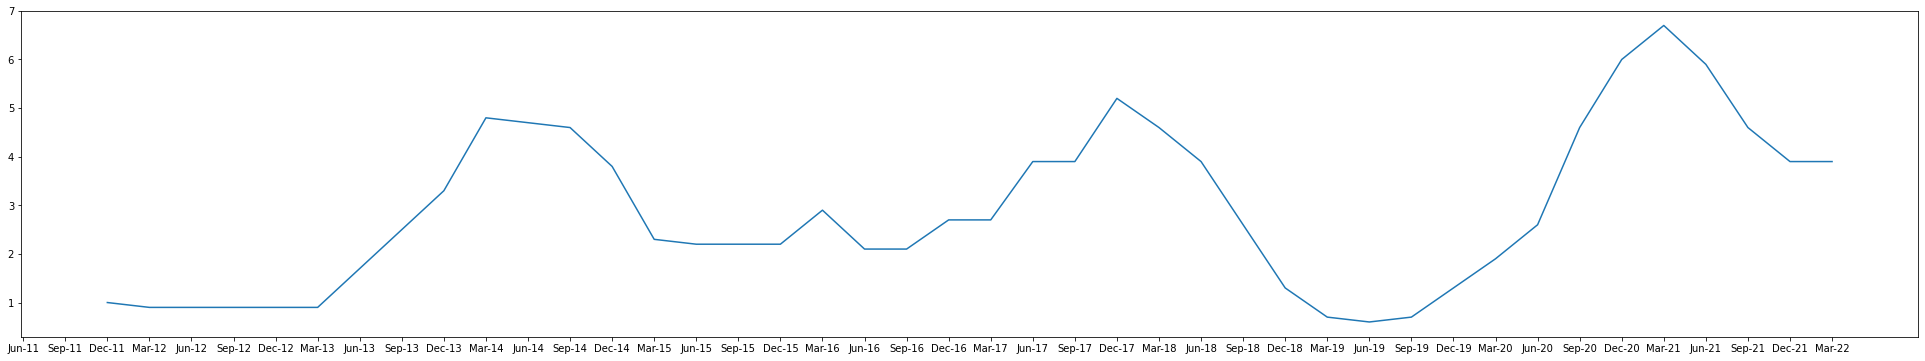

In [42]:
plt.figure(figsize=(34,6))
plt.plot(remaining_instances_with_miss_vals.iloc[1,2:])

Plotting the unemployment rates throughout time for Port Melbourne Industrial

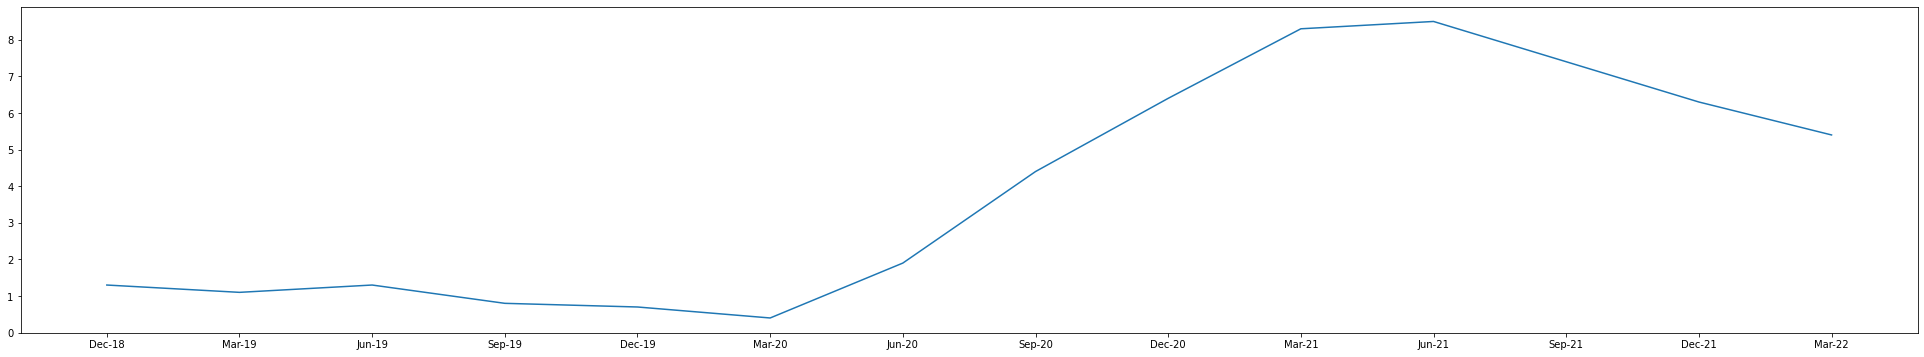

In [43]:
plt.figure(figsize=(34,6))
plt.plot(remaining_instances_with_miss_vals.iloc[0,2:])

Now, since the unemployment rates for Port Melbourne Industrial wasn't recorded from Dec-18 backwards (accounting for 32 missing instances), better remove that instance since it's hard to second guess the values.

As for Melbourne Airport,

In [44]:
remaining_instances_with_miss_vals

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
122,Port Melbourne Industrial,206051131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.7,0.4,1.9,4.4,6.4,8.3,8.5,7.4,6.3,5.4
246,Melbourne Airport,210051248,NaN,NaN,NaN,NaN,1.0,0.9,0.9,0.9,...,1.3,1.9,2.6,4.6,6.0,6.7,5.9,4.6,3.9,3.9


Again, here's the plot:

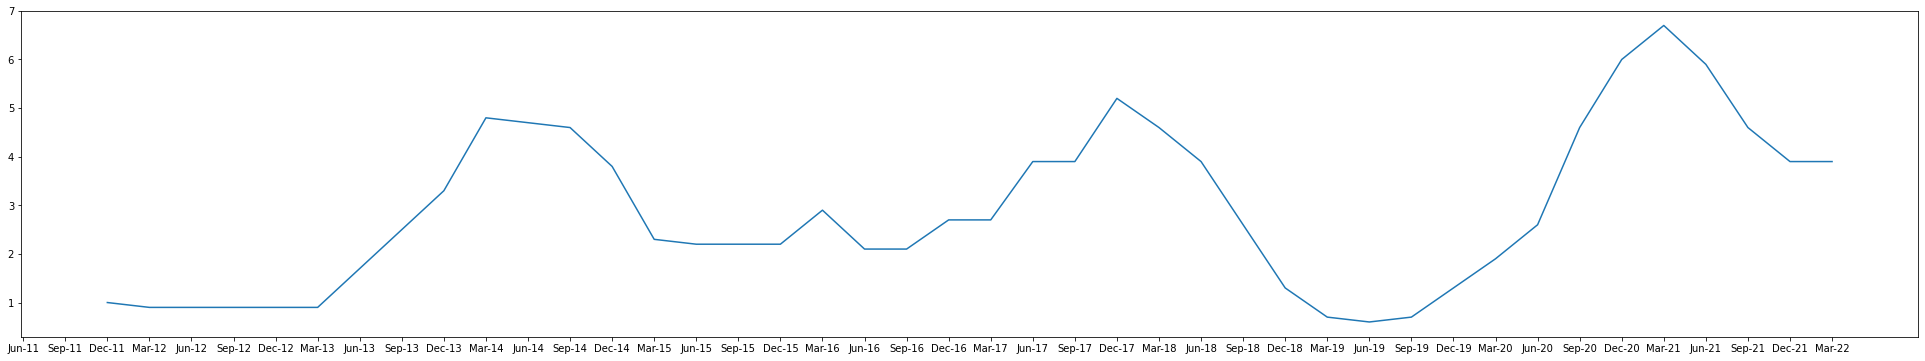

In [45]:
plt.figure(figsize=(34,6))
plt.plot(remaining_instances_with_miss_vals.iloc[1,2:])

since the unemp rates only rose from Mar-13 onwards it might be safe to conclude that the quantitites from Mar-13 backwards probably remained on a plateau up to Jun-11.

# <font color='blue'>Preprocessing: Remove instance corresponding to Port Melbourne Industrial and for Melbourne Airport, impute the 4 initial missing values using the value in Dec-11</font>

1 corresponds to the unemployment rate in Melbourne Airport for Dec-11 (at least it wont look like a magic number)

In [46]:
unemp_removed_SA2s

,SA2_Name,SA2_Code,Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,...,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,Sep-21,Dec-21,Mar-22
0,Alfredton,201011001,2.9,2.7,2.8,2.7,2.6,2.7,2.4,2.3,...,1.5,1.4,1.9,2.6,3.4,3.7,3.4,2.7,2.2,1.8
1,Ballarat,201011002,7.8,7.3,7.3,6.9,6.3,6.1,5.7,5.5,...,3.3,2.8,3.4,4.2,5.2,5.3,4.8,3.8,3.1,2.6
2,Ballarat - North,201011003,6.5,6.2,6.3,6.0,5.6,5.4,5.1,4.9,...,3.2,2.8,3.5,4.5,5.6,5.8,5.4,4.2,3.5,3.0
3,Ballarat - South,201011004,9.6,9.0,9.0,8.5,8.0,7.8,7.3,6.9,...,5.3,4.5,5.6,7.0,8.8,9.1,8.6,7.0,5.9,5.1
4,Buninyong,201011005,3.3,3.3,3.3,3.2,2.9,2.6,2.4,2.5,...,1.6,1.4,1.9,2.4,3.1,3.4,3.2,2.5,2.0,1.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,Otway,217031476,3.6,4.9,5.2,5.4,5.7,5.4,5.2,5.5,...,1.8,1.7,2.1,2.5,2.8,3.5,3.7,3.7,3.7,2.9
447,Moyne - East,217041477,2.9,3.7,3.9,3.9,3.7,3.6,3.5,3.8,...,2.2,2.4,2.6,2.8,2.7,3.1,3.2,3.3,3.5,3.0
448,Moyne - West,217041478,2.7,3.7,3.9,4.0,3.9,3.4,3.1,3.1,...,1.9,2.1,2.2,2.3,2.2,2.4,2.5,2.5,2.6,2.2
449,Warrnambool - North,217041479,4.4,5.9,6.2,6.2,6.0,5.5,5.1,5.4,...,3.0,3.2,3.2,3.3,3.1,3.5,3.7,3.8,4.0,3.3


In [47]:
unemp_removed_SA2s[unemp_removed_SA2s.SA2_Name == 'Melbourne Airport'] = remaining_instances_with_miss_vals[
                                remaining_instances_with_miss_vals['SA2_Name'] == 'Melbourne Airport'
                                ].\
                                fillna(1)

/tmp/ipykernel_22480/921634633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemp_removed_SA2s[unemp_removed_SA2s.SA2_Name == 'Melbourne Airport'] = remaining_instances_with_miss_vals[


In [48]:
unemp_removed_SA2s = unemp_removed_SA2s[unemp_removed_SA2s.SA2_Name != 'Port Melbourne Industrial']

# Save current preprocessed unemployment external dataset

In [49]:
history_employ_preproc.keys()

dict_keys([0, 1, 2, 3, 4])

In [50]:
history_employ_preproc[5] = {'data':None, 'description':None}
history_employ_preproc[5]['data'] = unemp_removed_SA2s.copy()
history_employ_preproc[5]['description'] = "Handled last 2 SA2s with missing values"

In [52]:
history_employ_preproc[5]['data'].to_csv('../data/curated/Preproc_Unemployment_Data.csv')